In [86]:
import pandas as pd
import numpy as np
import plotly.express as px
import os
import plotly.graph_objs as go

import streamlit as st

import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
data = pd.read_csv("cause_of_deaths.csv")
bevolking = pd.read_csv("world_population.csv")
GDP = pd.read_csv('GDP.csv')

In [48]:
#We gebruiken alleen de bevolking van 2020
bevolking = bevolking.drop(columns=['2022 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population',
                                   '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate', 'World Population Percentage', 'Capital', 'Rank'])

In [49]:
#we voegen de bevolking toe aan de originele dataset door te mergen op de Land Code
merged = pd.merge(data, bevolking, left_on='Code', right_on='CCA3')

,Country/Territory_x,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,CCA3,Country/Territory_y,Continent,2020 Population
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,4154,5945,2673,5005,323,2985,AFG,Afghanistan,Asia,38972230
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,4472,6050,2728,5120,332,3092,AFG,Afghanistan,Asia,38972230
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,5106,6223,2830,5335,360,3325,AFG,Afghanistan,Asia,38972230
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,5681,6445,2943,5568,396,3601,AFG,Afghanistan,Asia,38972230
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,6001,6664,3027,5739,420,3816,AFG,Afghanistan,Asia,38972230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,2373,2751,1956,4202,632,146,ZWE,Zimbabwe,Africa,15669666
6086,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,2436,2788,1962,4264,648,146,ZWE,Zimbabwe,Africa,15669666
6087,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,2473,2818,2007,4342,654,144,ZWE,Zimbabwe,Africa,15669666
6088,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,2509,2849,2030,4377,657,139,ZWE,Zimbabwe,Africa,15669666


In [51]:
#Van GDP gebruiken we alleen 2018
GDP2 = GDP.drop(GDP.iloc[:, 2:-2],axis = 1)
GDP2 = GDP2.drop(columns='2019')

In [52]:
#We voegen de GDP van elk land toe
mergedGDP = pd.merge(merged, GDP2, left_on='Code', right_on='Country Code')

,Country/Territory_x,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,CCA3,Country/Territory_y,Continent,2020 Population,Country,Country Code,2018
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,5005,323,2985,AFG,Afghanistan,Asia,38972230,Afghanistan,AFG,1955.006208
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,5120,332,3092,AFG,Afghanistan,Asia,38972230,Afghanistan,AFG,1955.006208
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,5335,360,3325,AFG,Afghanistan,Asia,38972230,Afghanistan,AFG,1955.006208
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,5568,396,3601,AFG,Afghanistan,Asia,38972230,Afghanistan,AFG,1955.006208
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,5739,420,3816,AFG,Afghanistan,Asia,38972230,Afghanistan,AFG,1955.006208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,4202,632,146,ZWE,Zimbabwe,Africa,15669666,Zimbabwe,ZWE,3029.793005
5876,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,4264,648,146,ZWE,Zimbabwe,Africa,15669666,Zimbabwe,ZWE,3029.793005
5877,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,4342,654,144,ZWE,Zimbabwe,Africa,15669666,Zimbabwe,ZWE,3029.793005
5878,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,4377,657,139,ZWE,Zimbabwe,Africa,15669666,Zimbabwe,ZWE,3029.793005


In [55]:
#We maken ook een dataset met het percentage van de bevolking dat dat jaar is overleden door die oorzaak ipv het totaal aantal doden
procent = merged[['Meningitis', "Alzheimer's Disease and Other Dementias", "Parkinson's Disease", "Nutritional Deficiencies", "Malaria",
               "Drowning", "Interpersonal Violence", "Maternal Disorders", "HIV/AIDS", "Drug Use Disorders", "Tuberculosis", "Cardiovascular Diseases",
               "Lower Respiratory Infections", "Neonatal Disorders", "Alcohol Use Disorders", "Self-harm", "Exposure to Forces of Nature",
               "Diarrheal Diseases", "Environmental Heat and Cold Exposure", "Neoplasms", "Conflict and Terrorism"
              ]].div(merged['2020 Population'], axis=0)


In [68]:
procent['Code'] = merged['Code']
procent['Country/Territory_x'] = merged['Country/Territory_x']
procent['Year'] = merged['Year']

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Code,Country/Territory_x
0,0.000055,0.000029,0.000010,0.000054,0.000002,0.000035,0.000039,0.000068,8.724161e-07,0.000002,...,0.000401,0.000002,0.000018,0.000000,0.000109,4.490377e-06,0.000297,3.823235e-05,AFG,Afghanistan
1,0.000057,0.000029,0.000010,0.000055,0.000005,0.000036,0.000051,0.000074,1.052031e-06,0.000003,...,0.000439,0.000002,0.000019,0.000035,0.000126,2.899500e-06,0.000303,8.647183e-05,AFG,Afghanistan
2,0.000064,0.000030,0.000010,0.000063,0.000006,0.000039,0.000059,0.000085,1.231646e-06,0.000003,...,0.000515,0.000002,0.000022,0.000016,0.000157,9.750533e-07,0.000314,1.114640e-04,AFG,Afghanistan
3,0.000072,0.000030,0.000010,0.000073,0.000003,0.000043,0.000066,0.000094,1.436921e-06,0.000003,...,0.000573,0.000002,0.000024,0.000006,0.000210,1.052031e-06,0.000324,1.051005e-04,AFG,Afghanistan
4,0.000078,0.000031,0.000010,0.000079,0.000005,0.000046,0.000073,0.000099,1.616536e-06,0.000004,...,0.000598,0.000002,0.000025,0.000004,0.000211,1.129009e-06,0.000331,2.298816e-04,AFG,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0.000092,0.000048,0.000014,0.000193,0.000161,0.000049,0.000083,0.000086,1.861048e-03,0.000007,...,0.000592,0.000003,0.000143,0.000001,0.000326,2.361250e-06,0.000712,8.296284e-07,ZWE,Zimbabwe
6086,0.000093,0.000049,0.000014,0.000195,0.000131,0.000051,0.000086,0.000085,1.732073e-03,0.000007,...,0.000579,0.000003,0.000147,0.000002,0.000319,2.361250e-06,0.000732,3.829054e-07,ZWE,Zimbabwe
6087,0.000093,0.000050,0.000014,0.000191,0.000135,0.000052,0.000087,0.000084,1.585611e-03,0.000007,...,0.000568,0.000003,0.000149,0.000016,0.000316,2.361250e-06,0.000749,3.190878e-07,ZWE,Zimbabwe
6088,0.000093,0.000051,0.000014,0.000186,0.000133,0.000053,0.000089,0.000083,1.410751e-03,0.000008,...,0.000555,0.000003,0.000151,0.000000,0.000303,2.361250e-06,0.000768,5.743581e-07,ZWE,Zimbabwe


In [60]:
#We maken een nieuwe dataframe waar we de landen groeperen per continent en jaar
Group = merged.groupby(['Continent', 'Year'], as_index=False)

,Country/Territory_x,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,CCA3,Country/Territory_y,Continent,2020 Population
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,4154,5945,2673,5005,323,2985,AFG,Afghanistan,Asia,38972230
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,4472,6050,2728,5120,332,3092,AFG,Afghanistan,Asia,38972230
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,5106,6223,2830,5335,360,3325,AFG,Afghanistan,Asia,38972230
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,5681,6445,2943,5568,396,3601,AFG,Afghanistan,Asia,38972230
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,6001,6664,3027,5739,420,3816,AFG,Afghanistan,Asia,38972230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Guam,GUM,2015,2,32,8,3,0,6,6,...,17,47,31,41,1,0,GUM,Guam,Oceania,169231
2186,Guam,GUM,2016,2,34,9,3,0,6,6,...,17,47,31,42,1,0,GUM,Guam,Oceania,169231
2187,Guam,GUM,2017,2,35,9,3,0,6,6,...,17,49,32,42,1,0,GUM,Guam,Oceania,169231
2188,Guam,GUM,2018,2,37,9,3,0,6,6,...,17,51,32,43,1,0,GUM,Guam,Oceania,169231


In [69]:
procent2 = procent.copy()


In [70]:
procentGDP = pd.merge(procent2, GDP2, left_on='Code', right_on='Country Code')

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Code,Country/Territory_x,Year,Country,Country Code,2018
0,0.000055,0.000029,0.000010,0.000054,0.000002,0.000035,0.000039,0.000068,8.724161e-07,0.000002,...,0.000109,4.490377e-06,0.000297,3.823235e-05,AFG,Afghanistan,1990,Afghanistan,AFG,1955.006208
1,0.000057,0.000029,0.000010,0.000055,0.000005,0.000036,0.000051,0.000074,1.052031e-06,0.000003,...,0.000126,2.899500e-06,0.000303,8.647183e-05,AFG,Afghanistan,1991,Afghanistan,AFG,1955.006208
2,0.000064,0.000030,0.000010,0.000063,0.000006,0.000039,0.000059,0.000085,1.231646e-06,0.000003,...,0.000157,9.750533e-07,0.000314,1.114640e-04,AFG,Afghanistan,1992,Afghanistan,AFG,1955.006208
3,0.000072,0.000030,0.000010,0.000073,0.000003,0.000043,0.000066,0.000094,1.436921e-06,0.000003,...,0.000210,1.052031e-06,0.000324,1.051005e-04,AFG,Afghanistan,1993,Afghanistan,AFG,1955.006208
4,0.000078,0.000031,0.000010,0.000079,0.000005,0.000046,0.000073,0.000099,1.616536e-06,0.000004,...,0.000211,1.129009e-06,0.000331,2.298816e-04,AFG,Afghanistan,1994,Afghanistan,AFG,1955.006208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,0.000092,0.000048,0.000014,0.000193,0.000161,0.000049,0.000083,0.000086,1.861048e-03,0.000007,...,0.000326,2.361250e-06,0.000712,8.296284e-07,ZWE,Zimbabwe,2015,Zimbabwe,ZWE,3029.793005
5876,0.000093,0.000049,0.000014,0.000195,0.000131,0.000051,0.000086,0.000085,1.732073e-03,0.000007,...,0.000319,2.361250e-06,0.000732,3.829054e-07,ZWE,Zimbabwe,2016,Zimbabwe,ZWE,3029.793005
5877,0.000093,0.000050,0.000014,0.000191,0.000135,0.000052,0.000087,0.000084,1.585611e-03,0.000007,...,0.000316,2.361250e-06,0.000749,3.190878e-07,ZWE,Zimbabwe,2017,Zimbabwe,ZWE,3029.793005
5878,0.000093,0.000051,0.000014,0.000186,0.000133,0.000053,0.000089,0.000083,1.410751e-03,0.000008,...,0.000303,2.361250e-06,0.000768,5.743581e-07,ZWE,Zimbabwe,2018,Zimbabwe,ZWE,3029.793005


In [72]:
procentGDP2018 = procentGDP.loc[procentGDP['Year']==2018]

In [ ]:
st.title('Statistische voorspellingen')

In [73]:
fig = plt.figure()
sns.regplot(data= data3, x="Total_Deaths", y="2020 Population", ci=None)
sns.scatterplot(data= data3, x="Total_Deaths", y="2020 Population",color="red",marker="s")
plt.title('Regressiemodel geplot aantal doden wordt voorspeld door de populatie')
plt.xlabel('Aantal doden per land x miljoen')
plt.ylabel('Populatie per land x 100 miljoen')
plt.show()
st.plotly_chart(fig, use_container_width=True)

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Code,Country/Territory_x,Year,Country,Country Code,2018
28,0.000040,0.000045,0.000014,0.000033,1.195723e-05,0.000043,0.000141,0.000105,7.466855e-06,0.000010,...,0.000118,1.513898e-06,0.000530,6.948281e-04,AFG,Afghanistan,2018,Afghanistan,AFG,1955.006208
58,0.000005,0.000307,0.000084,0.000002,0.000000e+00,0.000013,0.000021,0.000001,6.976300e-07,0.000010,...,0.000002,1.395260e-06,0.001608,0.000000e+00,ALB,Albania,2018,Albania,ALB,13364.155400
88,0.000007,0.000115,0.000028,0.000003,0.000000e+00,0.000012,0.000011,0.000015,6.328871e-06,0.000012,...,0.000012,7.364505e-07,0.000528,1.749070e-06,DZA,Algeria,2018,Algeria,DZA,15481.787620
118,0.000077,0.000032,0.000008,0.000093,3.228684e-04,0.000024,0.000028,0.000063,5.004116e-04,0.000002,...,0.000407,3.380351e-06,0.000366,9.273528e-07,AGO,Angola,2018,Angola,AGO,6452.355165
148,0.000011,0.000173,0.000054,0.000032,0.000000e+00,0.000043,0.000054,0.000000,8.633342e-05,0.000000,...,0.000022,0.000000e+00,0.001446,0.000000e+00,ATG,Antigua and Barbuda,2018,Antigua and Barbuda,ATG,26868.133520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,0.000009,0.000212,0.000036,0.000018,1.804113e-05,0.000019,0.000393,0.000019,6.605722e-05,0.000003,...,0.000047,3.860942e-07,0.001132,0.000000e+00,VEN,Venezuela,2018,"Venezuela, RB",VEN,NaN
5788,0.000008,0.000196,0.000043,0.000010,6.311519e-07,0.000064,0.000013,0.000003,6.724354e-05,0.000012,...,0.000018,8.587804e-07,0.001127,3.104026e-08,VNM,Vietnam,2018,Vietnam,VNM,7447.814334
5818,0.000015,0.000052,0.000012,0.000031,1.399763e-04,0.000026,0.000035,0.000054,1.028372e-05,0.000008,...,0.000210,1.300952e-06,0.000381,9.533811e-04,YEM,Yemen,2018,"Yemen, Rep.",YEM,2575.126385
5848,0.000110,0.000038,0.000010,0.000103,2.543889e-04,0.000019,0.000083,0.000042,1.251974e-03,0.000003,...,0.000402,4.437937e-06,0.000498,2.641629e-07,ZMB,Zambia,2018,Zambia,ZMB,4223.906936


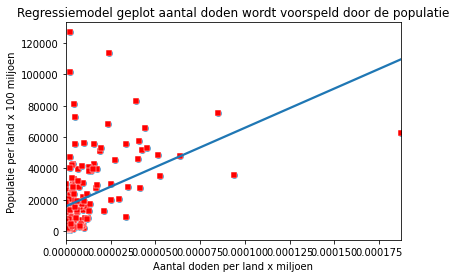

In [87]:
fig = plt.figure()
sns.regplot(data= procentGDP2018, x="Drug Use Disorders", y="2018", ci=None)
sns.scatterplot(data= procentGDP2018, x="Drug Use Disorders", y="2018",color="red",marker="s")
plt.title('Regressiemodel Aantal doden voorspelt door BBP')
plt.xlabel('Percentage van bevolking overleden door Drug Use Disorders')
plt.ylabel('BBP')
plt.show()
st.plotly_chart(fig, use_container_width=True)

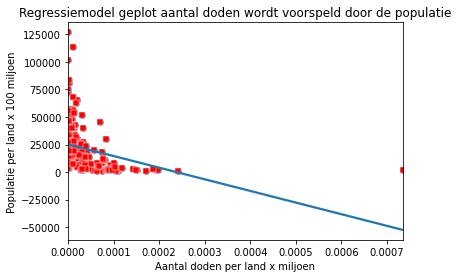

In [89]:
fig = plt.figure()
sns.regplot(data= procentGDP2018, x="Nutritional Deficiencies", y="2018", ci=None)
sns.scatterplot(data= procentGDP2018, x="Nutritional Deficiencies", y="2018",color="red",marker="s")
plt.title('Regressiemodel Aantal doden voorspelt door BBP')
plt.xlabel('Percentage van bevolking overleden door Nutritional Deficiencies')
plt.ylabel('BBP')
plt.show()
st.plotly_chart(fig, use_container_width=True)

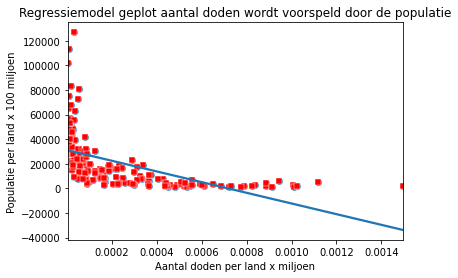

In [92]:
fig = plt.figure()
sns.regplot(data= procentGDP2018, x="Neonatal Disorders", y="2018", ci=None)
sns.scatterplot(data= procentGDP2018, x="Neonatal Disorders", y="2018",color="red",marker="s")
plt.title('Regressiemodel Aantal doden voorspelt door BBP')
plt.xlabel('Percentage van bevolking overleden door Neonatal Disorders')
plt.ylabel('BBP')
plt.show()
st.plotly_chart(fig, use_container_width=True)